In [25]:
import torch
from torch import nn
from custom_image_dataset import CustomImageDataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from image_helper import ImageHelper
from tqdm import tqdm

In [26]:
class SRCNN(nn.Module):
    def __init__(self) -> None:
        super(SRCNN, self).__init__()
        # 4.3 Model and Performance Trade-offs
        # Based on the basic network settings (i.e., f1 = 9, f2 = 1, f3 = 5, n1 = 64, and n2 = 32),
        f1 = 9
        f2 = 1
        f3 = 5
        n1 = 64
        n2 = 32

        self.model = nn.Sequential(

            # 3.1.1 Patch extraction and representation
            nn.Conv2d(in_channels=3, out_channels=n1,
                      kernel_size=(f1, f1), padding=(f1-1)//2),
            nn.ReLU(),

            # 3.1.2 Non-linear mapping
            nn.Conv2d(in_channels=n1, out_channels=n2,
                      kernel_size=(f2, f2), padding=(f2-1)//2),
            nn.ReLU(),

            # 3.1.3 Reconstruction
            nn.Conv2d(in_channels=n2, out_channels=3,
                      kernel_size=(f3, f3), padding=(f3-1)//2),
        )

    def forward(self, x: torch.Tensor):
        x = self.model(x)
        return x


In [13]:
# botar tqdm python

In [14]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in tqdm(enumerate(dataloader), total=len(dataloader)):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad(), tqdm(total=num_batches) as progress_bar:
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            progress_bar.update(1)

    test_loss /= num_batches

    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")


In [15]:
# Instancianting the model
model = SRCNN()

# hyperparameters
lr = 1e-5

In [16]:
transform_x = transforms.Compose([
    # resize image to 33x33 and downsample by BICUBIC interpolation
    transforms.Resize((33, 33), interpolation=Image.BICUBIC),
    # resize image to 256x256
    transforms.Resize((256, 256), interpolation=Image.BICUBIC)
])

transform_y = transforms.Compose([
    # resize image to 256x256 and downsample by BICUBIC interpolation
    transforms.Resize((256, 256), interpolation=Image.BICUBIC),
])

# Set up the data loaders
train_data_set = CustomImageDataset(
    img_dir="./datasets/DIV2K_train_HR/DIV2K_train_HR/", transform=transform_x, target_transform=transform_y)
test_data_set = CustomImageDataset(
    img_dir="./datasets/DIV2K_valid_HR/DIV2K_valid_HR/", transform=transform_x, target_transform=transform_y)

train_dataloader = DataLoader(train_data_set, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_data_set, batch_size=16)


In [17]:
# 3.3 Training
# The loss is minimized using stochastic gradient descent with the standard backpropagation
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# we use Mean Squared Error (MSE) as the loss function:
loss_fn = nn.MSELoss()

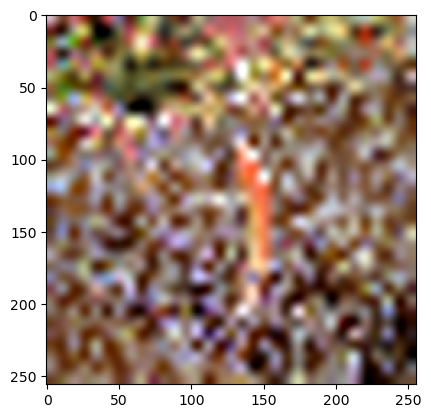

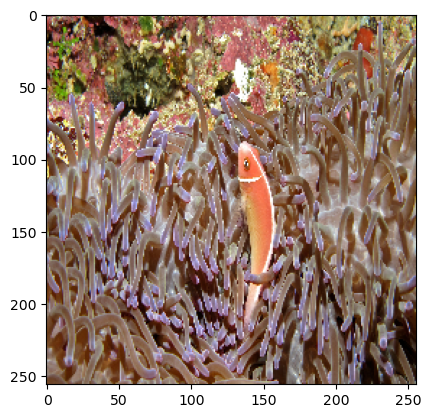

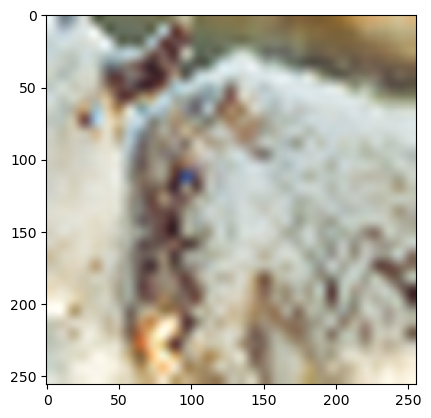

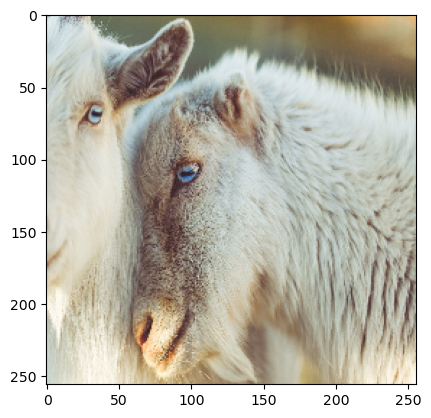

In [27]:
# example of training image
ImageHelperInstance = ImageHelper()

for a, b in train_data_set:
    ImageHelperInstance.show_tensor_as_image(a)
    ImageHelperInstance.show_tensor_as_image(b)
    break

for X, y in train_dataloader:
    ImageHelperInstance.show_tensor_as_image(X[0])
    ImageHelperInstance.show_tensor_as_image(y[0])
    break


In [19]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


  2%|▏         | 1/50 [00:09<07:53,  9.66s/it]

loss: 0.351796  [    0/  800]


100%|██████████| 7/7 [00:19<00:00,  2.72s/it]


Test Error: 
 Avg loss: 0.276345 

Epoch 2
-------------------------------


  2%|▏         | 1/50 [00:10<08:56, 10.96s/it]

loss: 0.277751  [    0/  800]


100%|██████████| 7/7 [00:13<00:00,  1.95s/it]


Test Error: 
 Avg loss: 0.275257 

Epoch 3
-------------------------------


  2%|▏         | 1/50 [00:08<06:58,  8.55s/it]

loss: 0.265129  [    0/  800]


100%|██████████| 7/7 [00:15<00:00,  2.25s/it]


Test Error: 
 Avg loss: 0.274177 

Epoch 4
-------------------------------


  2%|▏         | 1/50 [00:09<07:49,  9.59s/it]

loss: 0.245251  [    0/  800]


100%|██████████| 7/7 [00:14<00:00,  2.08s/it]


Test Error: 
 Avg loss: 0.273105 

Epoch 5
-------------------------------


  2%|▏         | 1/50 [00:09<07:51,  9.62s/it]

loss: 0.302658  [    0/  800]


100%|██████████| 7/7 [00:13<00:00,  1.98s/it]


Test Error: 
 Avg loss: 0.272042 

Epoch 6
-------------------------------


  2%|▏         | 1/50 [00:09<07:21,  9.02s/it]

loss: 0.312411  [    0/  800]


100%|██████████| 7/7 [00:13<00:00,  1.96s/it]


Test Error: 
 Avg loss: 0.270986 

Epoch 7
-------------------------------


  2%|▏         | 1/50 [00:09<07:46,  9.52s/it]

loss: 0.294288  [    0/  800]


100%|██████████| 7/7 [00:14<00:00,  2.03s/it]


Test Error: 
 Avg loss: 0.269938 

Epoch 8
-------------------------------


  2%|▏         | 1/50 [00:09<07:51,  9.62s/it]

loss: 0.297437  [    0/  800]


100%|██████████| 7/7 [00:12<00:00,  1.81s/it]


Test Error: 
 Avg loss: 0.268897 

Epoch 9
-------------------------------


  2%|▏         | 1/50 [00:09<07:21,  9.01s/it]

loss: 0.282461  [    0/  800]


100%|██████████| 7/7 [00:13<00:00,  1.91s/it]


Test Error: 
 Avg loss: 0.267864 

Epoch 10
-------------------------------


  2%|▏         | 1/50 [00:10<08:26, 10.34s/it]

loss: 0.225382  [    0/  800]


100%|██████████| 7/7 [00:13<00:00,  1.89s/it]

Test Error: 
 Avg loss: 0.266838 

Done!


In [20]:
torch.save(model.state_dict(), './model_weights/model.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


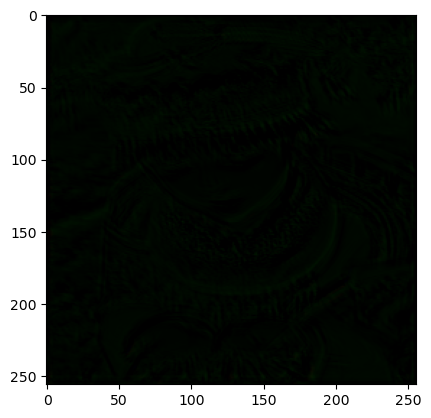

In [29]:
import matplotlib.pyplot as plt

plt.figure()
new_image_sr_np = new_image_sr.detach().numpy()
plt.imshow(new_image_sr_np.transpose((1, 2, 0)))
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x361 at 0x280E7D720>


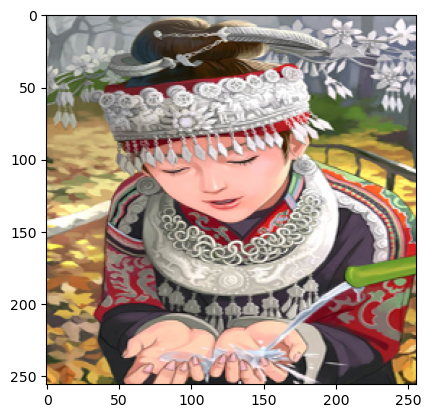

In [34]:
new_image = Image.open('./datasets/Set14/Set14/comic.png')
transform = transforms.Compose([transforms.ToTensor(),
                                # resize image to 512x512
                                transforms.Resize(
                                    (256, 256), interpolation=Image.BICUBIC)
                                ])
new_image_resize = transform(new_image)
print(new_image)
ImageHelperInstance.show_tensor_as_image(new_image_resize)

In [22]:
new_image_sr = model(new_image_resize)